*01-Titanic_Preprocessing.ipynb* <p style='text-align: right;'> <b> October 27th 2020 </b> </p>
<p style='text-align: right;'> <b> David Diston </b> </p>

# The Titanic Challenge
-------------
##### <u>From Kaggle:</u>
>![](Images/titanic2.png) <br/>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. <br/><br/>
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. <br/><br/>
In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy. <br/><br/>
This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

## EDA and Preprocessing
------------
I will be breaking this challenge up between two different notebooks:
* This first notebook will focus on exploration and visualization of the data, including preprocessing the data to remove missing values, and feature engineer
* The second notebook will focus on the modeling required to predict survival

### Focus of Preprocessing
>* Exploration of Missing Values (NaN Observations)
* Consider Either Removal or Imputation<br/><font size = '1'>
    * Column or Row Deletion
    * Linear/Mean Imputation</font>

### Focus of EDA
>* Data Import
* Exploration of the Variables<br/><font size = '1'>
    * Datatype
    * Range
    * Min/Max/Mean
    * Unique Values</font>
    * Visualization of Data Distributions
    
--------------
Following both the **EDA** and **Preprocessing** steps, visuals and preprocessed dataframes (.csv) will be exported to their respective folders within the working directory.

### <u>Requirements</u>
* Data can be obtained from Kaggle (data is also included in this repository)
* Python Libraries:<br/><font size = '3'>
        * numpy
        * pandas
        * matplotlib
        * scikit-learn 
</font>

----------
### Let's Get Started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Observations:
Already there are several important observations that can be made:
>* Firstly, each observation appears to have a unique `Passenger ID`
    * It is certainly possible to use the `Passenger ID` column as the index, however I am used to the index starting with `0` instead of `1`, so I will leave the dataframe as is for now
* The `Name` column has a high level of unique formatting
* The `SibSp` and `Parch` columns are not intuitive and require further explanation
    * SibSp: the number of siblings or spouses on board
    * Parch: the number of children and parents on board
* The `Ticket` column has a high level of format variability (it is unclear if this column will have predictive value)
* The `Fare` column appears to have a large distribution, judging only from the first few entries
* Several missing observations (NaN) are present in the `Cabin` column (again I am unsure of the predictive value this variable may offer)
* The `Embarked` column also requires explanation
    * S: Southampton
    * C: Cherbourg
    * Q: Queenstown
* Lastly, from the shape of the dataframe, this is a small dataset (891 observations), therefore every effort will be made to preserve as much data as possible when dealing with missing observations

## Preprocessing
---------
In order to properly explore and visualize the data, I will first need to preprocess the data by identifying and removing/imputing missing values in the dataframe. To find missing values, I will use the `pandas.isnull()` with the `sum()` aggregator to determine the number of missing values for each variable.

### Finding and Eliminating NaN Observations

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is a substantial disparity in the proportion of missing observations between the variables. Most variables (thankfully) have no missing observations. However, `Age` and `Cabin` both have a high proportion of missing values, with `Embarked` missing two observations.

As mentioned above, this dataset is quite small. Therefore, I will make an effort to maintain as much data as possible in the dataset, by using imputation to fill for missing (NaN) observations. I will begin the exploration and imputation process further below, however the possibility of deletion of missing observations should not be ignored. In an effort to be as thorough as possible, I will create two versions of the dataset that can be used in model training; one dataset that is completely preprocessed with imputation primarily used to fill missing observations, and a second dataset that removes missing observations from the dataset. Since removing missing observations from the dataset is a much simpler process, I will begin with removal, and continue with imputation further below.

#### Method 1: NaN Removal
------------
Prior to removing row-wise observations (passengers) will missing values, it is pudent to first remove variables (columns) will a high proportion of missing data. By doing so, this will maintain a maximum of data in the final dataframe. Since the vast majority of the `Cabin` variable is missing, I will remove this entire column from the dataframe. I will also remove the `Ticket` column as this contains specific/administrative data that is not predictive.

In [6]:
df.drop('Cabin', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

Now that the `Cabin` and `Ticket` variables have been removed, all remaining missing values can be removed row-wise (`Age`, `Embarked`). This process can be performed with the `pd.dropna()` function.

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum().sum()

0

Now that all missing values have been removed from the dataframe, this new dataframe can be saved for future modeling.

In [9]:
df.to_csv('Data/train_nanremoved.csv', index = False)

#### Method 2: NaN Imputation
---------
Imputing NaN values is a much more difficult process and often requires a certain level of subjectivity and/or specific knowledge about the subject. This process will be carried out in full below, however first I must reload a clean copy of the original training data from which to work.

In [10]:
df = pd.read_csv('Data/train.csv')

I will start by investigating the `Cabin` variable as this represents the greatest challenge. While most of the data is missing, due to the limited size of the dataset, it would be nice to get as much out of the data that is present as possible. It is also worth while contemplating the usefulness of this data, and its potential predictive power.

While the cabin number of a passenger on the Titanic may itself be completely unpredictive of the survival status of that passenger, the actual location of the cabin may be predictive. Reasonably one could argue that since the disaster happened at night, most guests would be in their cabin. It follows then that passengers in cabins further from the lifeboats may have a lower chance of survival than those closer to the lifeboats. Additionally, since there were not enough lifeboats for all passengers, those located furthest from the lifeboats may have found that they were all gone by the time they arrived, substantially lowering that passenger’s chance of survival.

Clearly there is potential for the cabin of a passenger to be predictive of survival. However, more investigation will be required to determine, based on the proportion of missing data, if this variable can reasonably be included in any predictive model.

In [11]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Of the data that is present in the `Cabin` variable, it appears each observation is composed of a 'Deck Letter' followed by a 'Room Number'. The room number (where on each deck the room is located) is likely too specific to provide predictive influence. However, the deck letter provides an approximate distance of the cabin from the lifeboat deck, and therefore may be predictive. I will start by isolating the deck letter, and removing the room number from each cabin observation.

In [12]:
for row in range(len(df)):
    if str(df.loc[row, 'Cabin']) == 'nan':
        pass
    else:
        df.loc[row, 'Cabin'] = str(df.loc[row, 'Cabin'])[:1]
        
print(df['Cabin'].unique())
df['Cabin'].value_counts()

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

A curious observation is the `Cabin` 'T' with 1 observation. From external research, the Titanic had 7 passenger cabin decks, A through G. While there was a 'T' deck, this was the lowest deck of the ship, reserved for storage, supplies, cargo, baggage, and other similar uses. There were indeed cabins on this deck, however they were reserved for engineering staff of the ship, and not accessible to the paying passengers. Since this dataset only concerns the paying passengers, and not the crew, there must be an explanation for the 'T' cabin. 

My initial thought was that this could have been a data-entry mistake, with 'F' or 'G' intended. However, this seemed somewhat unlikely as I discovered (below) that this passenger was a 1st Class passenger, an all 1st Class cabins were located on decks 'A' through 'E'. Further research showed a peculiarity in the naming convention of cabins specifically on 'A' deck. Certain of these cabins were assigned specific letter prefixes that did not correspond to the 'A' deck. Research showed that 'T' was indeed one of these cabins. 

Since I will be using the `Cabin` variable as a proxy for the distance of a cabin from the lifeboat deck, it makes sense to reassign this one observation to the deck letter convention of all cabins, and change the value of this observation from 'T' to 'A'. Prior to carrying out this change, I will compare the paid fare of this passenger with all other passengers on 'A' deck to make sure that this change makes sense when considering the other data in the dataset.

***Note:*** as will be clear below, the average fare paid by a passenger varies considerably between different decks of the ship even within the same fare class. This is due to several factors including cabin size, and proximity to desirable amenities (sun decks, restaurants, etc.).

In [13]:
df[df['Cabin'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [14]:
a1 = df[(df['Pclass'] == 1) & (df['Cabin'] == 'A')]['Fare'].mean()
print(f'A 1st Class: {a1}')
b1 = df[(df['Pclass'] == 1) & (df['Cabin'] == 'B')]['Fare'].mean()
print(f'B 1st Class: {b1}')
c1 = df[(df['Pclass'] == 1) & (df['Cabin'] == 'C')]['Fare'].mean()
print(f'C 1st Class: {c1}')
d1 = df[(df['Pclass'] == 1) & (df['Cabin'] == 'D')]['Fare'].mean()
print(f'D 1st Class: {d1}')
d2 = df[(df['Pclass'] == 2) & (df['Cabin'] == 'D')]['Fare'].mean()
print(f'D 2nd Class: {d2}')
e1 = df[(df['Pclass'] == 1) & (df['Cabin'] == 'E')]['Fare'].mean()
print(f'E 1st Class: {e1}')
e2 = df[(df['Pclass'] == 2) & (df['Cabin'] == 'E')]['Fare'].mean()
print(f'E 2nd Class: {e2}')
e3 = df[(df['Pclass'] == 3) & (df['Cabin'] == 'E')]['Fare'].mean()
print(f'E 3rd Class: {e3}')
f2 = df[(df['Pclass'] == 2) & (df['Cabin'] == 'F')]['Fare'].mean()
print(f'F 2nd Class: {f2}')
f3 = df[(df['Pclass'] == 3) & (df['Cabin'] == 'F')]['Fare'].mean()
print(f'F 3rd Class: {f3}')
g3 = df[(df['Pclass'] == 3) & (df['Cabin'] == 'G')]['Fare'].mean()
print(f'G 3rd Class: {g3}')

A 1st Class: 39.623886666666664
B 1st Class: 113.50576382978724
C 1st Class: 100.15134067796612
D 1st Class: 63.32428620689656
D 2nd Class: 13.166675
E 1st Class: 55.74016799999998
E 2nd Class: 11.5875
E 3rd Class: 11.0
F 2nd Class: 23.75
F 3rd Class: 10.611659999999999
G 3rd Class: 13.58125


***Note:*** .mean() calculations on a pandas dataframe by default ignore NaN values.

In [15]:
df.loc[339, 'Cabin'] = 'A'
df.loc[339].to_frame().T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45,0,0,113784,35.5,A,S


With a fare paid of £35.5 for Passenger ID 340 (Blackwell, Mr. Stephen Weart), this is quite like the average fare paid by a 1st Class passenger on 'A' Deck (£39.63 average fare). This supports my decision to change the `Cabin` observation for this passenger from 'T' to 'A', as I have done above.

However, imputing for missing data in the `Cabin` column presents a challenge that may require subjectivity and the introduction of bias if I am to use this variable in a predictive model. Exploring the data, it is possible to narrow down the possible cabin locations of each passenger based on their class. Since cabins of different classes are distinct in character (e.g. size), one would expect that cabins of a particular class would be grouped together. In fact, each deck of the Titanic has a specific cabin layout that is easily found online. The available cabin classes on each deck are as follows:

|Deck|Cabin Classes|
|---|---|
|A|1st|
|B|1st|
|C|1st|
|D|1st, 2nd|
|E|1st, 2nd, 3rd|
|F|2nd, 3rd|
|G|3rd|

While this class breakdown on each deck is helpful at narrowing down the possibilities for where a particular passenger resided, additional information is required in order to make both a reasonable and specific prediction.

Especially in 1st Class, and to a lesser extent 2nd and 3rd Class, there is a noticeable difference between the average fare paid on different decks within the same fare class. Therefore, it could be argued that the fare paid for a ticket in a particular class is a good indicator of the likely deck on which a passenger resided. Looking at the aggregate statistics and quartiles for the `Fare` variable for each Fare Class, and comparing that with the known mean fare paid for each class of service on each deck among non-missing observations, it could be possible (with some additional research) to make a reasonable prediction of cabin location based upon the class of service and fair paid.

In [16]:
df[(df['Pclass'] == 1) & (df['Fare'] > 0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,211.000000,211.000000,211.0,183.000000,211.000000,211.000000,211.000000
mean,456.687204,0.644550,1.0,38.220874,0.426540,0.364929,86.148874
std,245.334673,0.479788,0.0,14.923661,0.615712,0.700002,78.212155
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,5.000000
25%,270.500000,0.000000,1.0,27.000000,0.000000,0.000000,32.910400
50%,463.000000,1.000000,1.0,37.000000,0.000000,0.000000,61.979200
75%,662.000000,1.000000,1.0,49.000000,1.000000,0.500000,99.962500
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [17]:
df[(df['Pclass'] == 2) & (df['Fare'] > 0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,178.000000,178.000000,178.0,173.000000,178.000000,178.000000,178.000000
mean,443.859551,0.488764,2.0,29.877630,0.415730,0.393258,21.358661
std,253.216545,0.501284,0.0,14.001077,0.607095,0.698958,13.083169
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,10.500000
25%,230.000000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,430.500000,0.000000,2.0,29.000000,0.000000,0.000000,15.022900
75%,666.750000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


In [18]:
df[(df['Pclass'] == 3) & (df['Fare'] > 0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,487.000000,487.000000,487.0,351.000000,487.000000,487.000000,487.000000
mean,439.983573,0.242300,3.0,25.059601,0.620123,0.396304,13.787875
std,264.987545,0.428915,0.0,12.483653,1.379392,0.891793,11.760718
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,4.012500
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,434.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,668.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


Now that I have a breakdown of the quartiles of Fare Paid for each of the three classes, I can compare these groupings to the know averages from above and come up with a reasonable prediction of where each passenger resided. Below, I have used multiple nested conditions to impute the `Cabin` variable where missing. This required some amount of external research as well; I will explain my methodology here:

***1st Class:***

>1st Class accommodation could be found on decks 'A' through 'E', which can not evenly distribute with 4 quartiles of data. However, I have found from research that the number of cabins on 'A' deck was quite small, accommodating only a few passengers. These were also not the most desirable of 1st class accommodations on account of their comparably small size, and proximity to busy common areas. This can be seen also in the `Fare` for 1st Class tickets on 'A' deck, which has the lowest average for any 1st Class accommodation. Owing to the 16 passengers already occupying the 'A' deck (15 from the dataset, plus passenger 340 from above), I will make the subjective decision not to add any further passengers to deck 'A'. <br/> Accounting for this decision, there are now 4 decks of 1st Class accommodation over which to place 4 quartiles of `Fare` observations. Upon inspection, the known averages for 1st Class `Fare` for each deck 'B' through 'E' correspond quite closely with the quartile cut-offs, giving some support to this imputation.

***2nd Class:***

>Imputation for 2nd Class passenger cabins requires some additional understanding. 1st Class average `Fare` clearly fell with each lower deck, however 2nd Class (and 3rd Class below) `Fare` averages do not share this pattern. To make sense of this pattern, knowledge of the fare structure and cabin layout helps to shed some light. Firstly, the `Fare` observation is not actually the fare for that passenger, but the fare for the ticket on which they are travelling. A single ticket is provided for an entire group that is travelling together (e.g. a whole family). Logically, higher fares for 2nd and 3rd Class passengers did not necessarily indicate a better or bigger room, but rather more berths per ticket. Families in 2nd and 3rd class, depending on their size, could be split among several cabins, or in some cases sharing cabins with other ticket holders. <br/> The likely reason that the highest `Fare` observations are found on 'F' deck is because 'F' deck had the largest concentration of berths per room. Therefore, logically larger families who where is total paying a higher fare would have been most often located in this part of the ship. While this observation is interesting, most importantly it supports a logical rationale for the imputation below. <br/> The second highest 2nd Class `Fare` average was found on 'D' deck. 2nd Class cabins on 'D' deck were unique. There were officially designated 2nd Class, however they were slightly larger and more highly appointed to be used as 1st Class overflow on journeys with sufficient demand. Naturally, such a berth in such a cabin would be priced at a premium. <br/> The lowest average 2nd Class `Fare` was found on 'E' deck where a substantial proportion of the 2nd Class passenger cabins were located, therefore a larger proportion of low fare 2nd Class passengers have been imputed with 'E' deck below.

***3rd Class:***

>Understanding the known average 3rd Class `Fare` for each deck follows similar logic to 2nd Class fares. On the Titanic, the largest 3rd Class cabins that could accommodate large families were all on 'G' deck. They were found across most of the length of the ship on this deck, where, by contrast, smaller 3rd Class accommodations on 'E' and 'F' decks were found wedged into the bow and stern. Therefore 'G' deck with its many families had the highest average `Fare` for 3rd Class passengers. <br/> 'E' deck with slightly larger cabins had the second highest average 3rd Class `Fare`, while 'F' deck with small accommodations closer to the engines had the lowest average 3rd Class `Fare`.

In [19]:
for row in range(len(df)):
    if str(df.loc[row, 'Cabin']) != 'nan':
        pass
    else:
        if df.loc[row, 'Pclass'] == 1:
            if df.loc[row, 'Fare'] > 99.96:
                df.loc[row, 'Cabin'] = 'B'
            elif df.loc[row, 'Fare'] > 61.98:
                df.loc[row, 'Cabin'] = 'C'
            elif df.loc[row, 'Fare'] > 32.91:
                df.loc[row, 'Cabin'] = 'D'
            else:
                df.loc[row, 'Cabin'] = 'E'
                
        elif df.loc[row, 'Pclass'] == 2:
            if df.loc[row, 'Fare'] > 26:
                df.loc[row, 'Cabin'] = 'F'
            elif df.loc[row, 'Fare'] > 15.02:
                df.loc[row, 'Cabin'] = 'D'
            else:
                df.loc[row, 'Cabin'] = 'E'
                
        else:
            if df.loc[row, 'Fare'] > 8.05:
                df.loc[row, 'Cabin'] = 'G'
            elif df.loc[row, 'Fare'] > 7.75:
                df.loc[row, 'Cabin'] = 'E'
            else:
                df.loc[row, 'Cabin'] = 'F'

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

After the above imputation, there are now no more NaN `Cabin` observations.

`Age` is a very important variable, as it is likely quite predictive of survival (think 'Women and Children first!'). Therefore, if it is possible to avoid eliminating a substantial portion of the dataframe by imputing `Age` this could be very beneficial to any predictive model. 

`Age` can be imputed with a similar methodology as `Cabin` above, that is based on the value of other variables for a particular observations, the `Age` value can be predicted with a reasonable level of confidence. For example, it is reasonable to predict that a man in 3rd Class with a traveling partner and two children would be of a certain age range, while a girl in 2nd Class with two siblings and two parents on board can also be predicted to fall in a certain age range.

For each missing `Age` observation, the `Pclass`(class), `SibSp`(siblings/spouse), `Parch`(parents/children), and `Sex` are recorded. For all other observations in the dataframe sharing these exact values, the `Age` average of the observations is taken. This average is then used to impute a value into the missing `Age` observation. 

***Note:*** again it is important that by delault calling .mean() on a padas dataframe ignores NaN values.

In [21]:
for row in range(len(df)):
    if str(df.loc[row, 'Age']) != 'nan':
        pass
    else:
        pclass = df.loc[row, 'Pclass']
        sibsp = df.loc[row, 'SibSp']
        parch = df.loc[row, 'Parch']
        sex = df.loc[row, 'Sex']
        avg = df[(df['Parch'] == parch) & (df['SibSp'] == sibsp) & (df['Pclass'] == pclass) & (df['Sex'] == sex)]['Age'].mean()
        df.loc[row, 'Age'] = avg

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            8
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [23]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,G,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,G,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,G,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,G,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,G,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,G,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,G,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,G,S


There are a few remaining missing values for `Age` in the dataframe. A unique solution will be found for each of these.

In [24]:
df[(df['Pclass'] == 3) & (df['Parch'] == 2) & (df['SibSp'] == 1)]['Age'].mean()

13.5

In [25]:
df[df['Name'].str.contains('^Johnston')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0,3,"Johnston, Mr. Andrew G",male,13.5,1,2,W./C. 6607,23.45,G,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,G,S


It appears as though passengers 784 and 889 were most likely siblings, and therefore reasonably a similar age. 

In [26]:
df.loc[888, 'Age'] = 13.5
df.loc[888].to_frame()

,888
PassengerId,889
Survived,0
Pclass,3
Name,"Johnston, Miss. Catherine Helen ""Carrie"""
Sex,female
Age,13.5
SibSp,1
Parch,2
Ticket,W./C. 6607
Fare,23.45


In [27]:
df[(df['Pclass'] == 3) & (df['Parch'] == 2) & (df['SibSp'] > 3)]['Age'].mean()

8.357142857142858

All the members of the Sage Family that are missing ages appear to be siblings. Again, the average age for the most similar demographic will be used for imputation.

In [28]:
df['Age'].fillna(8, inplace = True)
df['Age'].isnull().sum()

0

Now, finally there are only two NaN values remaining in the training dataframe, both in the `Embarked` variable.

In [29]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [30]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Similar to above, in order to reasonably impute values for the `Embarked` variable, I will try and find similar demographics, or family members to try and give insight.

In [31]:
df[df['Name'].str.contains('^Stone')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [32]:
df[df['Name'].str.contains('^Icard')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN


In [33]:
df[df['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [34]:
df[df['Fare'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [35]:
df[df['Cabin'] == 'B']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.434783,1,0,PC 17569,146.5208,B,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.9792,B,C
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,B,NaN
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B,C
139,140,0,1,"Giglio, Mr. Victor",male,24.000000,0,0,PC 17593,79.2000,B,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.000000,0,0,111240,33.5000,B,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.000000,0,0,PC 17610,27.7208,B,C
195,196,1,1,"Lurette, Miss. Elise",female,58.000000,0,0,PC 17569,146.5208,B,C
257,258,1,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.5000,B,S
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,B,C


There does not appear to be any clear demographic or familial pattern that would lead to a reasonable rationale for the imputation of a particular value in this case. Therefore, the remaining options are to remove the observations, or impute with the most common observation. Imputing simply with the most common observation, without any additional rationale certainly introduces a high level of bias into the data. However, I think it quite unlikely that the `Embarked` variable will provide substantial predictive power in a future model. Therefore, to preserve the non-`Embarked` information of each of these observations, I will impute with 'S', the most common value, confident that this introduced bias will in all likelihood have an extremely minimal effect on a future model.

In [36]:
df['Embarked'].fillna('S', inplace = True)
df['Embarked'].isnull().sum()

0

In [37]:
df.isnull().sum().sum()

0

Now that all missing values have been imputed/removed, the next step in preprocessing to consider is feature engineering.

### Variable Alteration | Feature Engineering

When looking at altering existing variables or creating new variables, one of the easiest places to start was with the `Cabin` variable. As mentioned above, the `Cabin` variable initially contained a deck letter and cabin number. During the process of removing missing values, this column was already altered and optimized for a future predictive model.

Another potentially new feature to consider would be `Family Size`, and could be determined by adding the number of siblings/spouses and parents/children, and then adding 1 (to account for that individual). Right out of the gate there is the potential for collinearity and/or multicollinearity since this new `Family Size` variable would simply be the sum of two other variables. This is a concern that will be dealt with during the modeling process. However, for now, it is conceivable that total family size has the potential to be more predictive than `SibSp` and `Parch` combined. Therefore, this new variable will be created below.

In [38]:
df.insert(8, 'FamilySize', (df['SibSp'] + df['Parch'] + 1))

There is a great deal of information contained in the `Name` variable, however much of this data is too specific to individual observations to be considered generally predictive. However, the personal/professional title of a passenger may be predictive. For example, it is conceivable that titles of younger passengers such as 'Miss' and 'Master' may be indicative of a greater chance at survival, especially compared to titles such as 'Mr' and 'Mrs'. For different reasons, the title 'Rev' or 'Capt' may be predictive of a lower chance of survival. 

To begin, a new `Title` variable will be created filled with NaN values. I will then search the string values in the `Name` column for the most common titles. Since some titles are quite specific and infrequent, only the more frequently used titles will be included. This will leave some NaN values remaining in the `Title` variable, however these will be addressed later when the `Title` variable is dummy coded.

In [39]:
df.insert(4, 'Title', np.nan)
for row in range(len(df)):
    if 'Mr.' in df.loc[row, 'Name']:
        df.loc[row, 'Title'] = 'Mr'
    elif 'Mrs.' in df.loc[row, 'Name']:
        df.loc[row, 'Title'] = 'Mrs'
    elif 'Miss.' in df.loc[row, 'Name']:
        df.loc[row, 'Title'] = 'Miss'
    elif 'Rev.' in df.loc[row, 'Name']:
        df.loc[row, 'Title'] = 'Rev'
    elif 'Master.' in df.loc[row, 'Name']:
        df.loc[row, 'Title'] = 'Master'
    elif 'Dr.' in df.loc[row, 'Name']:
        df.loc[row, 'Title'] = 'Dr'
        
df.drop('Name', axis = 1, inplace = True)

Now that the `Title` variable has been created the `Name` variable can be removed from the dataframe.

Another engineered variable that may be beneficial when modeling is the `Fare` paid per person. Looking through the dataset, it is clear that families share a single ticket number, and a total fair for all family members on that ticket. Therefore, the per person ticked price may provide a better understanding of the cost of travel.

In [40]:
df.insert(11, 'FarePP', round(df['Fare'] / df['FamilySize'], 4))

Of the variables in the dataframe, `Ticket` will likely be the least predictive of survival. All observations from exploring the data so far indicate that ticket numbers are simply administrative codes, providing no valuable information concerning the demographics, accommodation, or other passenger observation that could explain or predict survival. Therefore, this column will be removed from the dataset.

In [41]:
df.drop('Ticket', axis = 1, inplace = True)

Now that all missing values have been dealt with, potentially useful variables have been synthesised, and extraneous variables have been removed, the final step is to convert all non-numeric variables to dummy variables. Non-numeric variables remaining in the dataframe include `Title`, `Sex`, `Cabin`, and `Embarked`. Each of these variables will be dummy coded, following which the original variable will be removed from the dataframe.

**However!** I will wait to perform this process until after conducting Exploratory Data Analysis and Visualization to ensure I am able to investigate the entire preprocessed dataset prior to modeling. Dummy coding for both the training and testing sets will be performed at the end of this notebook, in addition to saving a copy of each of these preprocessed dataframes for modeling.

***Note:*** As mentioned above, the `Title` variable contains NaN observations where the title in the former `Name` column was deemed too niche and therefore not included. Since dummy coding does not include NaN values, each passenger observation without a `Title` dummy will be known to have had a niche title. For now (until dummy coding is performed) these NaN values will remain in the dataset.

In [42]:
df.sample(10)

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,FamilySize,Fare,FarePP,Cabin,Embarked
556,557,1,1,NaN,female,48.000000,1,0,2,39.6000,19.8000,A,C
471,472,0,3,Mr,male,38.000000,0,0,1,8.6625,8.6625,G,S
137,138,0,1,Mr,male,37.000000,1,0,2,53.1000,26.5500,C,S
763,764,1,1,Mrs,female,36.000000,1,2,4,120.0000,30.0000,B,S
285,286,0,3,Mr,male,33.000000,0,0,1,8.6625,8.6625,G,C
300,301,1,3,Miss,female,23.565789,0,0,1,7.7500,7.7500,F,Q
342,343,0,2,Mr,male,28.000000,0,0,1,13.0000,13.0000,E,S
742,743,1,1,Miss,female,21.000000,2,2,5,262.3750,52.4750,B,C
305,306,1,1,Master,male,0.920000,1,2,4,151.5500,37.8875,C,S
109,110,1,3,Miss,female,25.035714,1,0,2,24.1500,12.0750,G,Q


The training dataset has now been preprocessed. The next step with this data is to fully explore and visualize the data. However, before taking this step, the same preprocessing steps must be taken to prepare the training dataset.

## Preprocessing the Test Set

In [43]:
df2 = pd.read_csv('Data/test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
print(df2.shape)
df2.isnull().sum()

(418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The test dataset appears to have similar proportions of missing data in the `Age` and `Cabin` variables. Therefore, similar steps will be taken as above to remove/impute these values. As above with the training set I will perform NaN removal first, and then move on to NaN imputation.

#### Method 1: NaN Removal
------------
Prior to removing row-wise observations (passengers) will missing values, it is pudent to first remove variables (columns) will a high proportion of missing data. By doing so, this will maintain a maximum of data in the final dataframe. Since the vast majority of the `Cabin` variable is missing, I will remove this entire column from the dataframe. I will also remove the `Ticket` column as this contains specific/administrative data that is not predictive.

In [45]:
df2.drop('Cabin', axis = 1, inplace = True)
df2.drop('Ticket', axis = 1, inplace = True)
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Now that the `Cabin` and `Ticket` variables have been removed, all remaining missing values can be removed row-wise (`Age`, `Embarked`). This process can be performed with the `pd.dropna()` function.

In [46]:
df2.dropna(inplace = True)

In [47]:
df2.isnull().sum().sum()

0

Now that all missing values have been removed from the dataframe, this new dataframe can be saved for future modeling.

In [48]:
df2.to_csv('Data/test_nanremoved.csv', index = False)

#### Method 2: NaN Imputation
---------
For efficiency, I have condensed the general imputation preprocessing steps from the training dataset into a function. Filling values for specific NaN cases that remain will be done below.

In [49]:
def preprocess(df, cabin_var = 'Cabin'):
    df.insert(8, 'FamilySize', (df['SibSp'] + df['Parch'] + 1))
    
    for row in range(len(df)):
        if str(df.loc[row, cabin_var]) == 'nan':
            pass
        else:
            df.loc[row, cabin_var] = str(df.loc[row, cabin_var])[:1]
            
    for row in range(len(df)):
        if str(df.loc[row, 'Cabin']) != 'nan':
            pass
        else:
            if df.loc[row, 'Pclass'] == 1:
                if df.loc[row, 'Fare'] > 99.96:
                    df.loc[row, 'Cabin'] = 'B'
                elif df.loc[row, 'Fare'] > 61.98:
                    df.loc[row, 'Cabin'] = 'C'
                elif df.loc[row, 'Fare'] > 32.91:
                    df.loc[row, 'Cabin'] = 'D'
                else:
                    df.loc[row, 'Cabin'] = 'E'

            elif df.loc[row, 'Pclass'] == 2:
                if df.loc[row, 'Fare'] > 26:
                    df.loc[row, 'Cabin'] = 'F'
                elif df.loc[row, 'Fare'] > 15.02:
                    df.loc[row, 'Cabin'] = 'D'
                else:
                    df.loc[row, 'Cabin'] = 'E'

            else:
                if df.loc[row, 'Fare'] > 8.05:
                    df.loc[row, 'Cabin'] = 'G'
                elif df.loc[row, 'Fare'] > 7.75:
                    df.loc[row, 'Cabin'] = 'E'
                else:
                    df.loc[row, 'Cabin'] = 'F'
    
    df.insert(4, 'Title', np.nan)
    for row in range(len(df)):
        if 'Mr.' in df.loc[row, 'Name']:
            df.loc[row, 'Title'] = 'Mr'
        elif 'Mrs.' in df.loc[row, 'Name']:
            df.loc[row, 'Title'] = 'Mrs'
        elif 'Miss.' in df.loc[row, 'Name']:
            df.loc[row, 'Title'] = 'Miss'
        elif 'Rev.' in df.loc[row, 'Name']:
            df.loc[row, 'Title'] = 'Rev'
        elif 'Master.' in df.loc[row, 'Name']:
            df.loc[row, 'Title'] = 'Master'
        elif 'Dr.' in df.loc[row, 'Name']:
            df.loc[row, 'Title'] = 'Dr'
            
    for row in range(len(df)):
        if str(df.loc[row, 'Age']) != 'nan':
            pass
        else:
            pclass = df.loc[row, 'Pclass']
            sibsp = df.loc[row, 'SibSp']
            parch = df.loc[row, 'Parch']
            sex = df.loc[row, 'Sex']
            avg = df[(df['Parch'] == parch) & (df['SibSp'] == sibsp) & (df['Pclass'] == pclass) & (df['Sex'] == sex)]['Age'].mean()
            df.loc[row, 'Age'] = avg
    
    print(df.isnull().sum())
    return df

As above, I must load a fresh copy of the testing dataset prior to identifying and eliminating NaN values.

In [50]:
df2 = pd.read_csv('Data/test.csv')
df2 = preprocess(df2)

PassengerId    0
Pclass         0
Name           0
Sex            0
Title          4
Age            5
SibSp          0
Parch          0
Ticket         0
FamilySize     0
Fare           1
Cabin          0
Embarked       0
dtype: int64


The remaining `Title` NaN values will be taken care of when dummy coding. I will therefore look at the remaining `Age` and `Fare` NaN observations.

In [51]:
df2[df2['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Title,Age,SibSp,Parch,Ticket,FamilySize,Fare,Cabin,Embarked
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,Mrs,NaN,0,4,4133,5,25.4667,G,S
188,1080,3,"Sage, Miss. Ada",female,Miss,NaN,8,2,CA. 2343,11,69.5500,G,S
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,Master,NaN,1,2,W./C. 6607,4,23.4500,G,S
342,1234,3,"Sage, Mr. John George",male,Mr,NaN,1,9,CA. 2343,11,69.5500,G,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,Mrs,NaN,1,9,CA. 2343,11,69.5500,G,S


In [52]:
df2.loc[132, 'Age'] = df2[(df2['Pclass'] == 3) & (df2['Parch'] > 3)]['Age'].mean()
df2.loc[188, 'Age'] = df2[(df2['Pclass'] == 3) & (df2['SibSp'] > 3) & (df2['Parch'] == 2)]['Age'].mean()
df2.loc[244, 'Age'] = df2[(df2['Pclass'] == 3) & (df2['SibSp'] == 1) & (df2['Parch'] == 2)]['Age'].mean()
df2.loc[342, 'Age'] = df2[(df2['Pclass'] == 3) & (df2['SibSp'] == 1) & (df2['Parch'] > 4)]['Age'].mean()
df2.loc[365, 'Age'] = df2[(df2['Pclass'] == 3) & (df2['SibSp'] == 1) & (df2['Parch'] > 4)]['Age'].mean()

In [53]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Title          4
Age            0
SibSp          0
Parch          0
Ticket         0
FamilySize     0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [54]:
df2[df2['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Title,Age,SibSp,Parch,Ticket,FamilySize,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,Mr,60.5,0,0,3701,1,NaN,F,S


In [55]:
df2.loc[152, 'Fare'] = df2[(df2['Pclass'] == 3) & (df2['Sex'] == 'male') & (df2['SibSp'] == 0) & (df2['Parch'] == 0) & (df2['Cabin'] == 'F')]['Fare'].mean()

The missing `Fare` observation has now been imputed. I can now finish my feature engineering of the `FarePP` variable.

In [56]:
df2.insert(11, 'FarePP', round(df2['Fare'] / df2['FamilySize'], 4))

In [57]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Title          4
Age            0
SibSp          0
Parch          0
Ticket         0
FamilySize     0
Fare           0
FarePP         0
Cabin          0
Embarked       0
dtype: int64

Now that all NaN values have been removed (except the `Title` NaNs that will be removed during dummy coding as above), I am ready to drop the extra columns in the dataframe. As with the training dataset, dummy coding all the non-numeric variables will take place at the bottom of this notebook after EDA and Visualization.

In [58]:
df2.drop('Name', axis = 1, inplace = True)
df2.drop('Ticket', axis = 1, inplace = True)

df2.sample(10)

,PassengerId,Pclass,Sex,Title,Age,SibSp,Parch,FamilySize,Fare,FarePP,Cabin,Embarked
336,1228,2,male,Mr,32.000000,0,0,1,13.0000,13.0000,E,S
101,993,2,male,Mr,27.000000,1,0,2,26.0000,13.0000,D,S
54,946,2,male,Mr,30.612500,0,0,1,15.5792,15.5792,D,C
176,1068,2,female,Miss,20.000000,0,0,1,36.7500,36.7500,F,S
95,987,3,male,Mr,25.000000,0,0,1,7.7958,7.7958,E,S
380,1272,3,male,Mr,26.594203,0,0,1,7.7500,7.7500,F,Q
227,1119,3,female,Miss,24.865385,0,0,1,7.7500,7.7500,F,Q
105,997,3,male,Mr,28.000000,0,0,1,22.5250,22.5250,G,S
156,1048,1,female,Miss,29.000000,0,0,1,221.7792,221.7792,C,S
387,1279,2,male,Mr,57.000000,0,0,1,13.0000,13.0000,E,S


Now Preprocessing is officially complete. The next step below is to perform a thorough exploration and visualization of the data, prior to the modeling process.

## EDA and Visualization
----------
Exploratory Data Analysis and Visualization are an integral part of Data Analysis and Machine Learning. Only by building a thorough understanding of the contents and distributions of the data can informed conclusions and actionable recommendations be made.

Though we have both a training and testing dataset, this is not always the case in practicle applications of Data Science. Most of the EDA and Visualization below will focus on the training set, however at the end of this section, a detailed comparison of the training and testing dataframes will be conducted to ensure that they are representative of one another.

***Note:*** While correlation, collinearity, and multi-collinearity are importaint to understand when building a predictive model, they will not be discussed here. Exploring these factors could be included in EDA, however I feel they are more closely related to model statistical assumptions, and will therefore be fully duscussed and explored during the model-building process of this ML tutorial.

#### Exploring Aggregate Statistics in the Data
The first step in the EDA process is usually determining the independent variables present in the dataframe. To a large extend this process has been completed above, however it will be repeated here. We should also start to understand the general distribution of the data. This can most easily be done with the `.describe()` function which will provide aggregate information for all numeric variables in the dataset.

In [59]:
print(df.columns)
df.describe()

Index(['PassengerId', 'Survived', 'Pclass', 'Title', 'Sex', 'Age', 'SibSp',
       'Parch', 'FamilySize', 'Fare', 'FarePP', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,FamilySize,Fare,FarePP
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.496244,0.523008,0.381594,1.904602,32.204208,19.916376
std,257.353842,0.486592,0.836071,13.572276,1.102743,0.806057,1.613459,49.693429,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,1.000000,7.910400,7.250000
50%,446.000000,0.000000,3.000000,29.184492,0.000000,0.000000,1.000000,14.454200,8.300000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,2.000000,31.000000,23.666700
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,11.000000,512.329200,512.329200


Initial observations from the above table are, for the most part, expected. The independent variables as a group have a large variability in range and mean. This likely means that some form of data scaling will have to be used during modeling to produce optimal results. Indpendent variable ranges such as `Pclass` (1-3) and `Age` (0.42-80) are as expected. 

Less expected observations include the disparity between max`SibSp` and max`Parch`. If for example an idividual has 8 siblings (which is the maximum value for the `SibSp` varialbe), I would expect another individual to have 9 children (however the maximum value for `Parch` is only 6). This could be an indication of some sort of irregularity or error in the data, however it may simply be that by chance, the parents of the individual with 8 siblings ended up in the testing dataset. We can easily look for support of this explaination by looking at the maximum value for `Parch` in the testing set.

In [60]:
df2['Parch'].max()

9

Indeed, we can see that the above explaination is supported by the maximum value of `Parch` in the testing dataset.

Additional curiosities from the data distrubution of the training dataset include both the minimum and maximum `FarePP`. A minimum `Fare` of ₤0 would indicate that an individual recieved a free ticket, or otherwise did not pay for their journey. This seems unlikely. One could argue that the fare could have been paid by a different individual, however the `Fare` data appear to be linked to the `Ticket` itself regardless of the paying individual as can be seen in the case of families sharing a single ticket. It is most likely that this is some type of error in the data. Since a `Fare` of ₤0 exists, it stands that a `FarePP` of ₤0 also exists. 

A maximum `Fare` of ₤512 could certainly be possible, especially if a family is traveling together in 1st Class. However, a maximium `FarePP` (fare per person) of ₤512 seems quite unlikely for a single person ticket on Titanic, as this is the equivalent of ₤58,866.73 or \$76,202.98 UDS in 2020. External research shows that the most expensive ticket was indeed approximately ~₤500, however this ticket was shared by two individuals in 1st Class, 58 year-old Charlotte Drake Cardeza and her 36 year-old son Thomas, meaning that for this ticket the fare per passenger would instead be ~₤250.

When exploring many of the visualizations below, it may be importaint to keep these aggregate data peculiarities in mind, as they can be responsible for skews in the data that result in unexpected visuals.

### Visualization
------------------

As one of the most likely predictive variables of survival, starting visualization with `Age` seems appropriate. This is also a numeric variable with a comparatively large distribution, making it an easy variable for visualization. A basic understanding of the overall distribution of passenger `Age` on the Titanic can be accomplished with a simple Histogram.

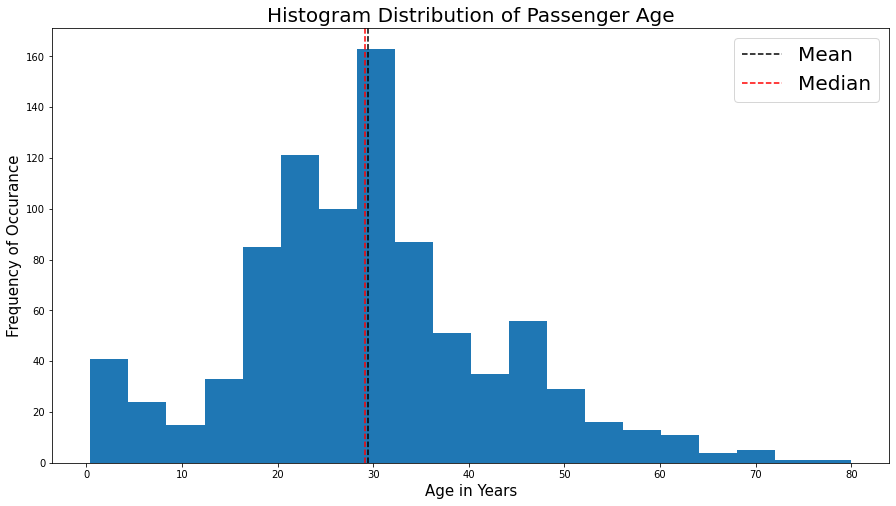

In [61]:
plt.figure(figsize = (15,8))

plt.hist(df['Age'], bins = 20)

plt.axvline(df['Age'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df['Age'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Histogram Distribution of Passenger Age', fontsize = 20)
plt.xlabel('Age in Years', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)

plt.savefig('Images/Passenger_Age_Distribution.png')
plt.show()

The above `Age` distribution shows a slight skew towards older passengers, however with a large number of very young children also in the dataset, this skew is counterbalanced such that the mean and median are nearly identical (both slightly below 30 years of age). While there appears to be some 'normalcy' in the distribution, this older skew and lare number of young children make the `Age` distribution not entirely normal.

While collinearity is not being directly discussed at the moment, it is often helpful during visualization to determine how independent variables interact with each other. This can be done simply by grouping the observations of one variable by that of another. In this case for example, the `Age` distribution can be broken down by the `Pclass` of the passenger as shown below.

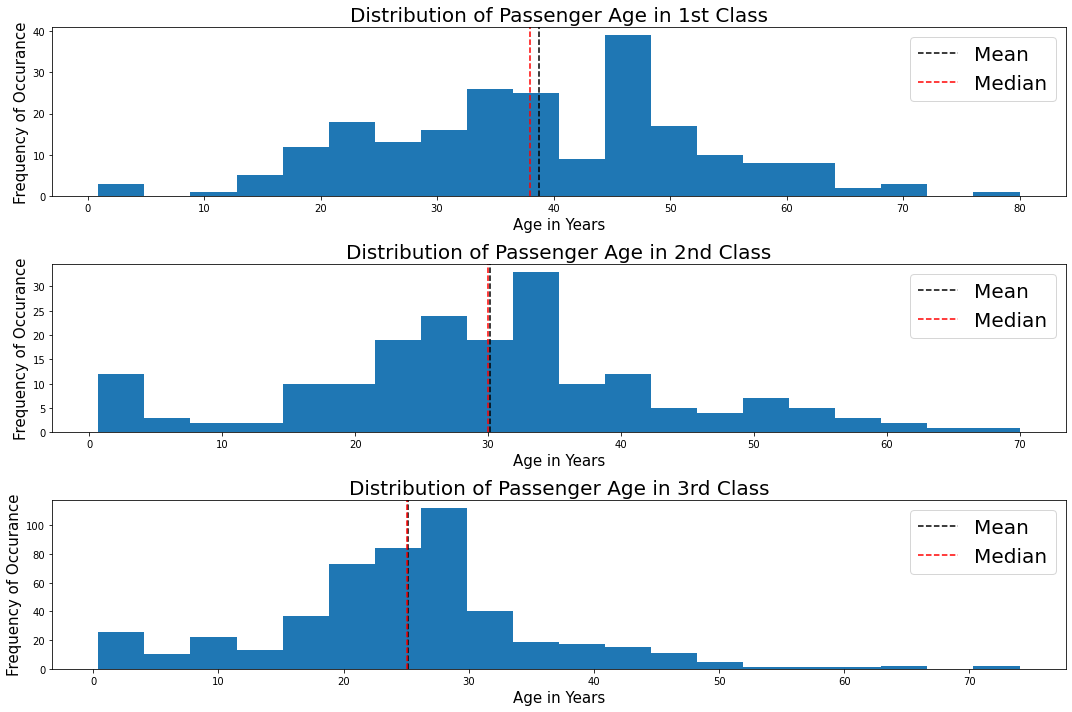

In [62]:
plt.subplots(3,1, figsize = (15,10))

plt.subplot(3,1,1)

plt.hist(df[df['Pclass'] == 1]['Age'], bins = 20)

plt.axvline(df[df['Pclass'] == 1]['Age'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 1]['Age'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Age in 1st Class', fontsize = 20)
plt.xlabel('Age in Years', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)


plt.subplot(3,1,2)

plt.hist(df[df['Pclass'] == 2]['Age'], bins = 20)

plt.axvline(df[df['Pclass'] == 2]['Age'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 2]['Age'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Age in 2nd Class', fontsize = 20)
plt.xlabel('Age in Years', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)

plt.subplot(3,1,3)

plt.hist(df[df['Pclass'] == 3]['Age'], bins = 20)

plt.axvline(df[df['Pclass'] == 3]['Age'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 3]['Age'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Age in 3rd Class', fontsize = 20)
plt.xlabel('Age in Years', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)

plt.tight_layout()

plt.savefig('Images/Passenger_Age_Distribution_by_Class.png')
plt.show()

Exploring and visualizing data in groups often leads to a more thorough understanding of the data distribution. As shown above, there is a high level of variation in the distribution of passenger age dependend upon the class in which they are travelling, observable not only by the shape and position of the distribution along the x-axis (age), but also the mean and median of each distribution, which varries significantly.

Several conclusions about the data can be made from the above visual. 1st Class passengers have the highest average age, while 3rd Class passengers have the youngest average age (almost 15 years difference between the classes). Looking at the y-axis of each subplot, the 3rd Class `Age` distribution appears to be more highly concentrated among middle age bins compared to 1st and 2nd class which appear to be somewhat more evenly distributed. Additionally, the mean and median of the 2nd and 3rd Class distributions are nearly identical, however an observable difference appears between these aggregate statistics in 1st class, indicating that the 1st Class `Age` distribution may be more influenced by outliers in the class sample.

`Fare` is also likely to be somewhat predictive of `Survival`, and another easy numeric variable to visualize.

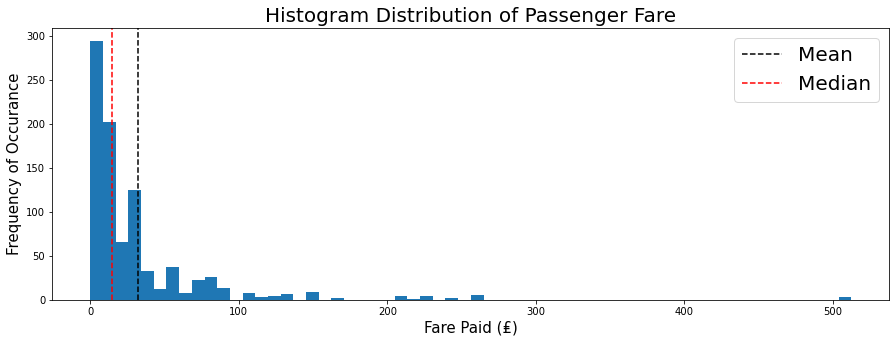

In [63]:
plt.figure(figsize = (15,5))

plt.hist(df['Fare'], bins = 60)

plt.axvline(df['Fare'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df['Fare'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Histogram Distribution of Passenger Fare', fontsize = 20)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)

plt.savefig('Images/Passenger_Fare_Distribution.png')
plt.show()

Additionally as with `Age`, `Fare` can also be investigated when broken down by class.

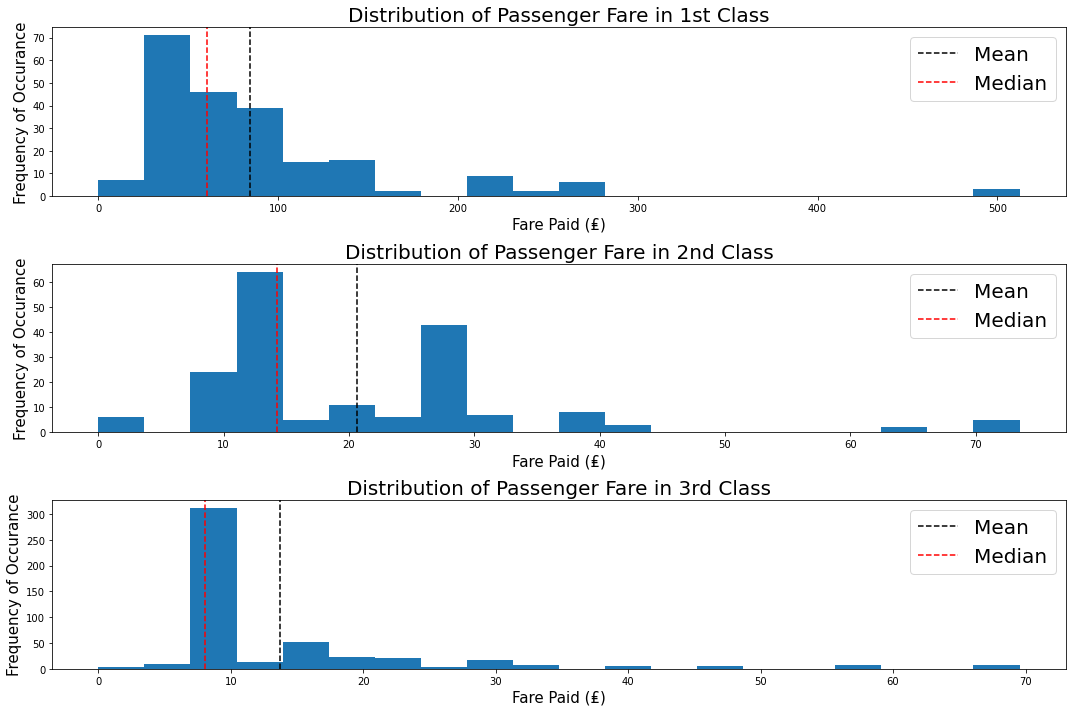

In [64]:
plt.subplots(3,1, figsize = (15,10))

plt.subplot(3,1,1)

plt.hist(df[df['Pclass'] == 1]['Fare'], bins = 20)

plt.axvline(df[df['Pclass'] == 1]['Fare'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 1]['Fare'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Fare in 1st Class', fontsize = 20)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)


plt.subplot(3,1,2)

plt.hist(df[df['Pclass'] == 2]['Fare'], bins = 20)

plt.axvline(df[df['Pclass'] == 2]['Fare'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 2]['Fare'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Fare in 2nd Class', fontsize = 20)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)


plt.subplot(3,1,3)

plt.hist(df[df['Pclass'] == 3]['Fare'], bins = 20)

plt.axvline(df[df['Pclass'] == 3]['Fare'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 3]['Fare'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Fare in 3rd Class', fontsize = 20)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)

plt.tight_layout()

plt.savefig('Images/Passenger_Fare_Distribution_by_Class.png')
plt.show()

There is a substantial amount of variability in the distribution of `Fare` paid both across the entire passenger population, and also within each class. I believe this is most likely a result of a high variation in the size of families. Recall, each `Fare` paid is for a single ticket, however each single ticket can be used for a predetermined number of travellers of any size (usually the size of a family or group traveling together). Therefore, the `Fare` variable is actually an agregate of two demographic factors, the fare per passenger and the number of people on a ticket. Though several conclusions regarding the distribution of `Fare` can be made from the above visuals (regarding `Fare` range, mean, median, distribution equality, normality, etc.), perhaps a more meaningful metric representing the cost of travel would be the `FarePP` or fare per person. Below, the distribution of `FarePP` is visualized for the entire population, and broken down by class as above.

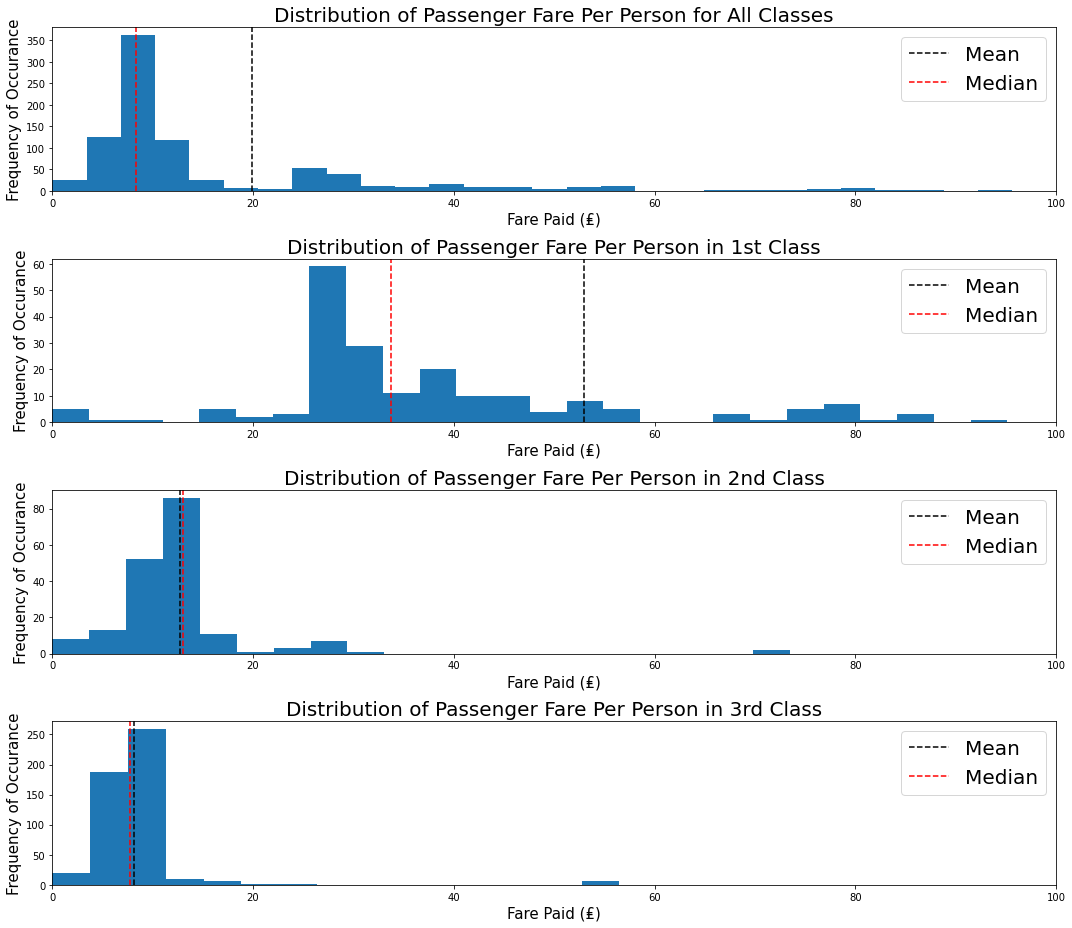

In [65]:
plt.subplots(4,1, figsize = (15,13))


plt.subplot(4,1,1)

plt.hist(df['FarePP'], bins = 150)

plt.axvline(df['FarePP'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df['FarePP'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Fare Per Person for All Classes', fontsize = 20)
plt.xlim(0, 100)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)


plt.subplot(4,1,2)

plt.hist(df[df['Pclass'] == 1]['FarePP'], bins = 140)

plt.axvline(df[df['Pclass'] == 1]['FarePP'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 1]['FarePP'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Fare Per Person in 1st Class', fontsize = 20)
plt.xlim(0, 100)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)


plt.subplot(4,1,3)

plt.hist(df[df['Pclass'] == 2]['FarePP'], bins = 20)

plt.axvline(df[df['Pclass'] == 2]['FarePP'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 2]['FarePP'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Fare Per Person in 2nd Class', fontsize = 20)
plt.xlim(0, 100)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)


plt.subplot(4,1,4)

plt.hist(df[df['Pclass'] == 3]['FarePP'], bins = 15)

plt.axvline(df[df['Pclass'] == 3]['FarePP'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df[df['Pclass'] == 3]['FarePP'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Passenger Fare Per Person in 3rd Class', fontsize = 20)
plt.xlim(0, 100)
plt.xlabel('Fare Paid (₤)', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)

plt.tight_layout()

plt.savefig('Images/Passenger_Fare_PerPerson_Distribution_by_Class.png')
plt.show()

***Note:*** The maximum fare paid per person is very different from class to class, however most observations in the dataset for `FarePP` fall below ₤100. Therefore for ease of comparrison between classes, the x-axis range has been set to ₤0-₤100 for all subplots, with the number of bins also adjusted to allow for similarity of visualization.

As discussed above, the `FarePP` is a much more representative metric of the cost of travel on the Titanic. When observing the distribution of `FarePP` for the whole population, there appears to be a substantial skew towards a high fare per person, so much so that the mean is approximately double the value of the median. However looking at the breakdown of `FarePP` by class, it is clear that the vast majority of outliers are present in the 1st Class population, with the mean and median for both 2nd and 3rd Class passengers being nearly identical respectively. Variability in the data also seems to decrease markedly from 1st to 3rd Class, with fare per person observations in 2nd and 3rd class being grouped much moser together when compared to the highly disperate observations of `FarePP` in 1st Class.

Based on external research, it seems most likely that the above observations stem from the comparably high variability in 1st Class accomodation over that of 2nd and 3rd Class. For the most part, 2nd and 3rd Class accomodations were equal within each class respectively. However in 1st Class, the Titanic had multiple options for suites, adjoining rooms, private parlours and balconies, etc. As such, one would expect a much higher variation in per person fare within 1st Class. Specifically there is a substantial skew towards higher fares per person, with the mean `FarePP` almost ₤20 higher than the median `FarePP` in 1st Class. Mean and median `FarePP` for 2nd and 3rd Class as mentioned are quite similar respectively, though a small numer of outliers in each class can be observed. 

Moving along to other passenger demographics, lets look at the feature engineered variable `FamilySize`. This variable was calculated as the sum of `Parch` and `SibSp` plus 1 (to account for the individual that the `Parch` and `SibSp` are observed for).

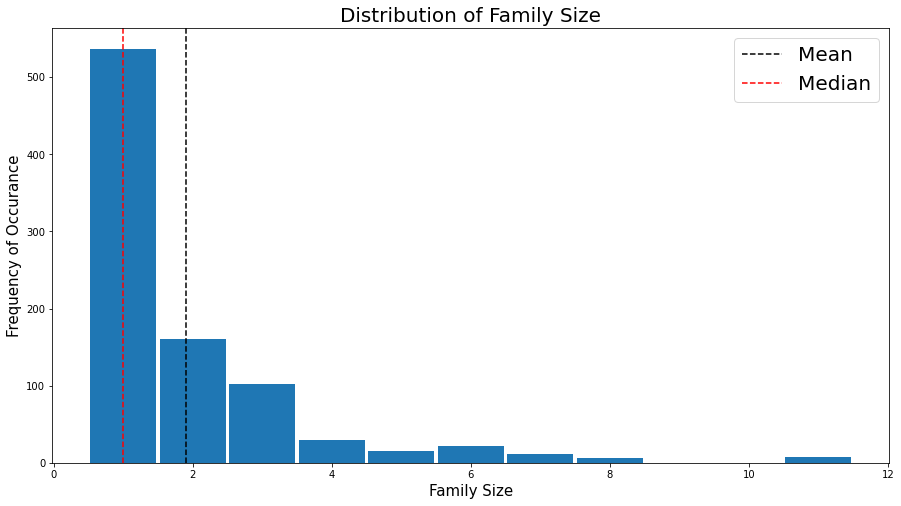

In [66]:
plt.figure(figsize = (15,8))

plt.bar(df['FamilySize'].value_counts().sort_index().index, 
        df['FamilySize'].value_counts().sort_index(), width = 0.95)

plt.axvline(df['FamilySize'].mean(), ls = '--', color = 'black', label = 'Mean')
plt.axvline(df['FamilySize'].median(), ls = '--', color = 'r', label = 'Median')

plt.legend(fontsize = 20)
plt.title('Distribution of Family Size', fontsize = 20)
plt.xlabel('Family Size', fontsize = 15)
plt.ylabel('Frequency of Occurance', fontsize = 15)

plt.savefig('Images/FamilySize_Distribution.png')
plt.show()

The distribution of `FamilySize` shows a heavy skew towards larger families, and is very non-normal. In fact, with a median `FamilySize` of only 1 individual, it appears as though most passengers were traveling alone, or otherwise traveling on their own ticket. As one would expect, fewer and fewer observations are observed in the dataset as the family size grows larger. These observations are for the most part expected, however, it may be more interesting to show the relationship of the `FamilySize` variable with the target variable of `Survived`.

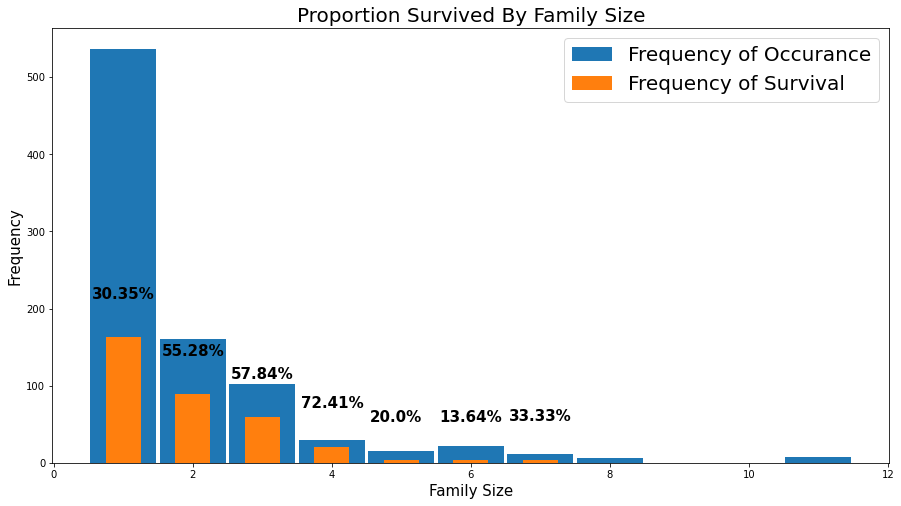

In [138]:
plt.figure(figsize = (15,8))

x = df['FamilySize'].value_counts().sort_index().index
y = df['FamilySize'].value_counts().sort_index().to_list()

plt.bar(df['FamilySize'].value_counts().sort_index().index, 
        df['FamilySize'].value_counts().sort_index(), width = 0.95, label = 'Frequency of Occurance')

x2 = df[df['Survived'] == 1]['FamilySize'].value_counts().sort_index().index
y2 = df[df['Survived'] == 1]['FamilySize'].value_counts().sort_index()

plt.bar(df[df['Survived'] == 1]['FamilySize'].value_counts().sort_index().index, 
        df[df['Survived'] == 1]['FamilySize'].value_counts().sort_index(), width = 0.5, label = 'Frequency of Survival')

for i, value in enumerate(y2):
    val = str(round((value / y[i] * 100), 2)) + '%'
    plt.text(i + 0.55, value + 50, val, fontsize = 15, fontweight = 'bold', label = 'Percentage Survival')

plt.legend(fontsize = 20)

plt.title('Proportion Survived By Family Size', fontsize = 20)
plt.xlabel('Family Size', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.savefig('Images/FamilySize_and_Survival_Distribution.png')
plt.show()

There appears to be a large disparity in the fuvival rate of different sized families, with small families surviving at a much higher rate than larger families or individuals (`FamilySize` = 1). These proportions of survival however are quite different from the raw number of survivers in each family size bin. For example, though individuals have a comparably *lower rate* of survival as a group, individuals account for the *largest group* of survivors. Interestingly, of the large families present in the training dataset, there appears to be 0% survival for members of families greater than 7 in size.

Exploration of the data through Visualization has so far focused on both discrete and continuous numerical data, we can also have a look at the distribution of non-numeric data such as the `Cabin` variable

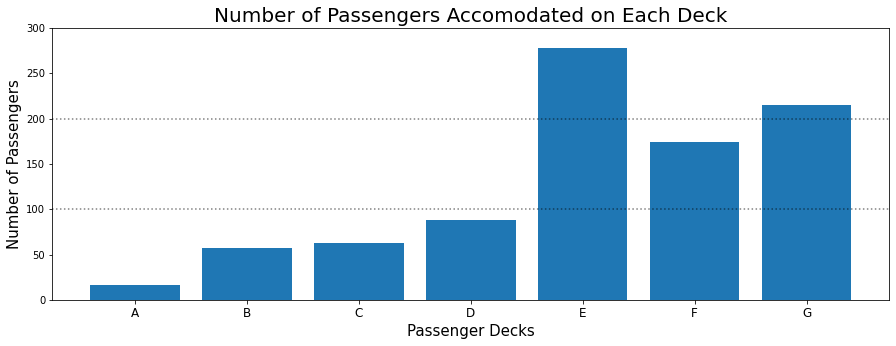

In [154]:
plt.figure(figsize = (15,5))

plt.bar(df['Cabin'].value_counts().sort_index().index, df['Cabin'].value_counts().sort_index())

plt.axhline(100, ls = ':', color = 'black', alpha = 0.5)
plt.axhline(200, ls = ':', color = 'black', alpha = 0.5)
plt.xticks(fontsize = 12)
plt.ylim(0, 300)
plt.title('Number of Passengers Accomodated on Each Deck', fontsize = 20)
plt.xlabel('Passenger Decks', fontsize = 15)
plt.ylabel('Number of Passengers', fontsize = 15)

plt.savefig('Images/Passenger_CabinDeck_Distribution.png')
plt.show()

In [142]:
sex = df['Sex'].value_counts().to_frame()
sex

,Sex
male,577
female,314


In [143]:
embarked = df['Embarked'].value_counts().to_frame()
embarked

,Embarked
S,646
C,168
Q,77


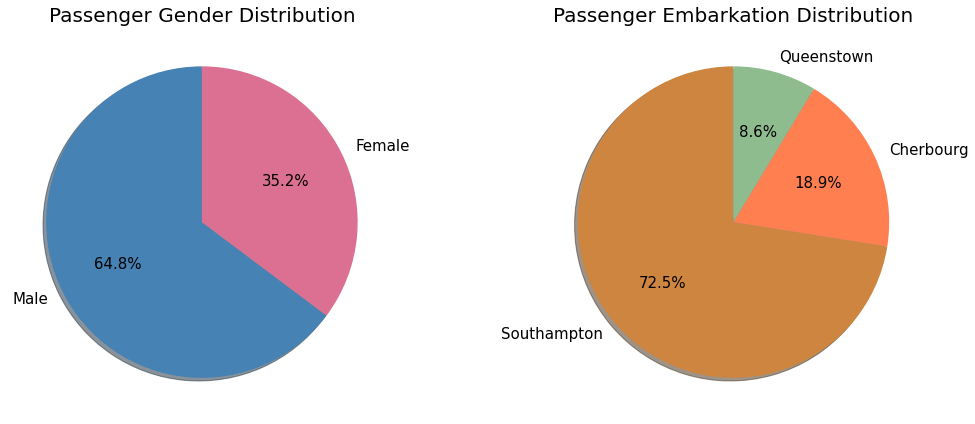

In [159]:
plt.subplots(1, 2, figsize = (15,6))

labels1 = ['Male', 'Female']
sizes1 = sex['Sex'].to_list()

plt.subplot(1,2,1)
plt.pie(sizes1, labels = labels1, autopct = '%1.1f%%',
        shadow = True, startangle = 90, colors = ['steelblue', 'palevioletred'], textprops={'fontsize': 15})
plt.title('Passenger Gender Distribution', fontsize = 20)

labels2 = ['Southampton', 'Cherbourg', 'Queenstown']
sizes2 = embarked['Embarked'].to_list()

plt.subplot(1,2,2)
plt.pie(sizes2, labels = labels2, autopct = '%1.1f%%',
        shadow = True, startangle = 90, colors = ['peru', 'coral', 'darkseagreen'], textprops={'fontsize': 15})

plt.title('Passenger Embarkation Distribution', fontsize = 20)

plt.tight_layout()

plt.savefig('Images/Passenger_Gender_and_Embarkation_Distribution.png')
plt.show()

In [145]:
group_list = ['Survived', 'Age', 'FamilySize', 'Fare']

eda_class = df.groupby(['Pclass'])[group_list].mean().copy()
eda_class

,Survived,Age,FamilySize,Fare
Pclass,,,,
1,0.629630,38.787491,1.773148,84.154687
2,0.472826,30.112715,1.782609,20.662183
3,0.242363,25.177832,2.008147,13.675550


In [146]:
group_list = ['Survived', 'Age', 'FamilySize', 'Fare']

eda_class_sex = df.groupby(['Pclass', 'Sex'])[group_list].mean().copy()
eda_class_sex.reset_index(inplace = True)
eda_class_sex

,Pclass,Sex,Survived,Age,FamilySize,Fare
0,1,female,0.968085,34.808928,2.010638,106.125798
1,1,male,0.368852,41.852942,1.590164,67.226127
2,2,female,0.921053,28.845614,2.092105,21.970121
3,2,male,0.157407,31.004378,1.564815,19.741782
4,3,female,0.500000,21.455763,2.694444,16.118810
5,3,male,0.135447,26.722436,1.723343,12.661633


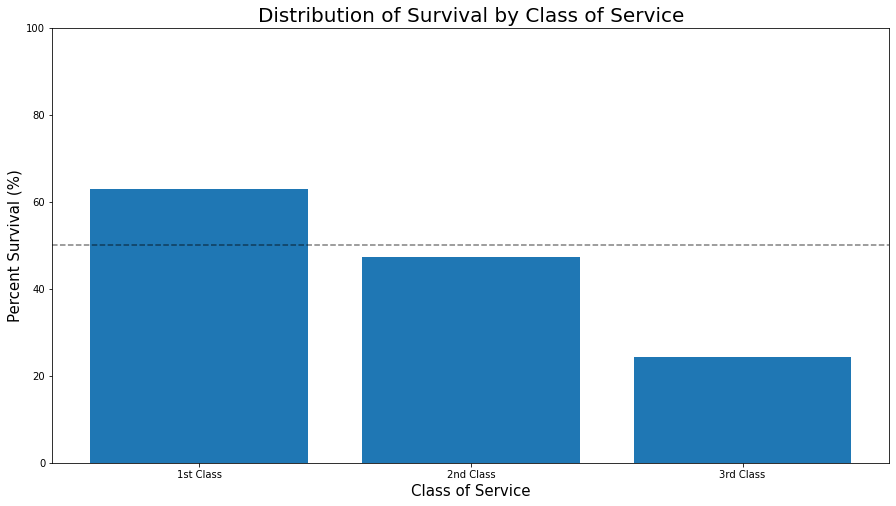

In [147]:
plt.figure(figsize = (15,8))

plt.bar(eda_class.index, eda_class['Survived']*100, tick_label = ['1st Class', '2nd Class', '3rd Class'])

plt.axhline(50, ls = '--', color = 'black', alpha = 0.5)
plt.ylim(0, 100)
plt.ylabel('Percent Survival (%)', fontsize = 15)
plt.xlabel('Class of Service', fontsize = 15)
plt.title('Distribution of Survival by Class of Service', fontsize = 20)

plt.savefig('Images/Survival_By_Class.png')
plt.show()

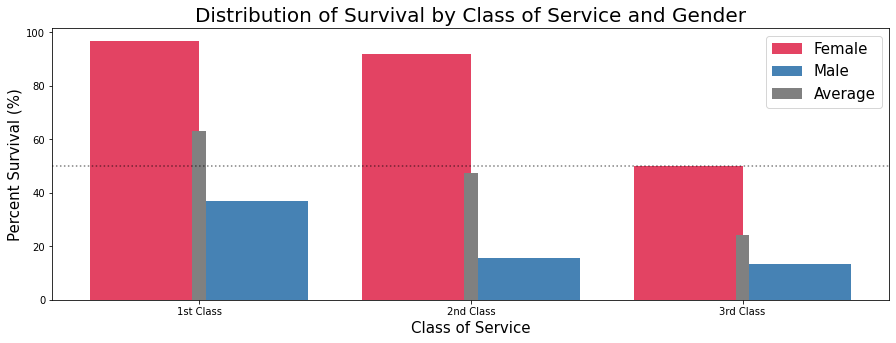

In [148]:
plt.figure(figsize = (15,5))

width = 0.4

plt.bar(eda_class_sex[eda_class_sex['Sex'] == 'female']['Pclass']-(width/2), 
        eda_class_sex[eda_class_sex['Sex'] == 'female']['Survived']*100, 
        tick_label = ['1st Class', '2nd Class', '3rd Class'], 
        width = width, color = 'crimson', alpha = 0.8, label = 'Female')

plt.bar(eda_class_sex[eda_class_sex['Sex'] == 'male']['Pclass'], 
        eda_class_sex[eda_class_sex['Sex'] == 'male']['Survived']*100, 
        tick_label = ['1st Class', '2nd Class', '3rd Class'], 
        align= 'edge', width = width, color = 'steelblue', label = 'Male')

plt.bar(eda_class.index, eda_class['Survived']*100, 
        tick_label = ['1st Class', '2nd Class', '3rd Class'], width = 0.05, color = 'grey', label = 'Average')

plt.axhline(50, ls = ':', color = 'black', alpha = 0.5)
plt.ylabel('Percent Survival (%)', fontsize = 15)
plt.xlabel('Class of Service', fontsize = 15)
plt.title('Distribution of Survival by Class of Service and Gender', fontsize = 20)
plt.legend(fontsize = 15)

plt.savefig('Images/Survival_By_Class_and_Gender.png')
plt.show()

In [149]:
group_list = ['Pclass', 'Survived', 'Age', 'FamilySize', 'Fare']

eda_cabin = df.groupby(['Cabin'])[group_list].mean()

eda_cabin_sex = df.groupby(['Cabin', 'Sex'])[group_list].mean()
eda_cabin_sex.reset_index(inplace = True)
eda_cabin_sex

,Cabin,Sex,Pclass,Survived,Age,FamilySize,Fare
0,A,female,1.000000,1.000000,48.000000,2.000000,39.600000
1,A,male,1.000000,0.400000,44.587037,1.200000,39.350553
2,B,female,1.000000,1.000000,32.170796,1.911765,133.350368
3,B,male,1.000000,0.391304,40.182770,1.782609,117.604170
4,C,female,1.000000,0.900000,34.074728,2.166667,113.511247
5,C,male,1.000000,0.333333,39.000943,2.000000,85.635858
6,D,female,1.617021,0.936170,34.243293,2.106383,39.103815
7,D,male,1.536585,0.243902,36.403422,1.634146,37.894412
8,E,female,2.203390,0.796610,28.854227,1.440678,22.281290
9,E,male,2.420091,0.168950,32.366008,1.105023,12.360211


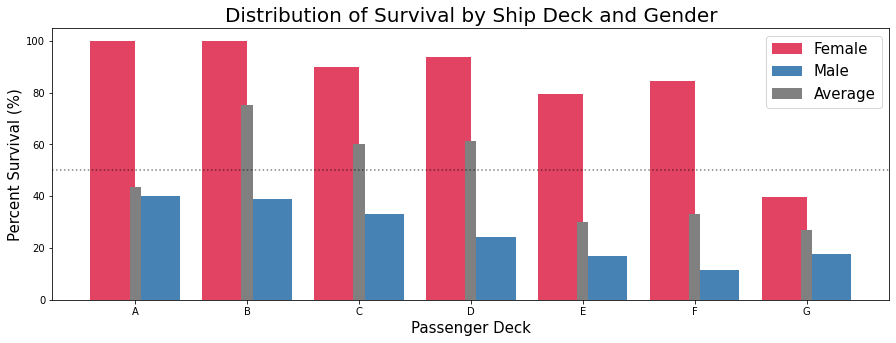

In [150]:
plt.figure(figsize = (15,5))

width = 0.4

plt.bar(eda_cabin_sex[eda_cabin_sex['Sex'] == 'female']['Cabin'], 
        eda_cabin_sex[eda_cabin_sex['Sex'] == 'female']['Survived']*100, 
        #tick_label = ['1st Class', '2nd Class', '3rd Class'], 
        align = 'edge' ,width = -width, color = 'crimson', alpha = 0.8, label = 'Female')

plt.bar(eda_cabin_sex[eda_cabin_sex['Sex'] == 'male']['Cabin'], 
        eda_cabin_sex[eda_cabin_sex['Sex'] == 'male']['Survived']*100, 
        #tick_label = ['1st Class', '2nd Class', '3rd Class'], 
        align= 'edge', width = width, color = 'steelblue', label = 'Male')

plt.bar(eda_cabin.index, eda_cabin['Survived']*100, 
        width = 0.1, color = 'grey', label = 'Average')

plt.axhline(50, ls = ':', color = 'black', alpha = 0.5)
plt.ylabel('Percent Survival (%)', fontsize = 15)
plt.xlabel('Passenger Deck', fontsize = 15)
plt.title('Distribution of Survival by Ship Deck and Gender', fontsize = 20)
plt.legend(fontsize = 15)

plt.savefig('Images/Survival_By_Deck_and_Gender.png')
plt.show()

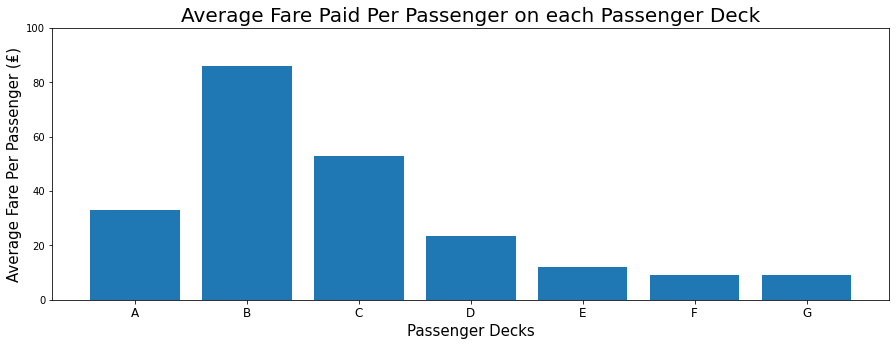

In [151]:
eda_cabin_farepp = df.groupby(['Cabin'])['FarePP'].mean().to_frame()

plt.figure(figsize = (15,5))
plt.bar(eda_cabin_farepp.index, eda_cabin_farepp['FarePP'])

plt.xticks(fontsize = 12)
plt.ylim(0, 100)
plt.title('Average Fare Paid Per Passenger on each Passenger Deck', fontsize = 20)
plt.xlabel('Passenger Decks', fontsize = 15)
plt.ylabel('Average Fare Per Passenger (₤)', fontsize = 15)

plt.savefig('Images/Average_Fare_Per_Deck.png')
plt.show()

### Dummy Coding Non-Numeric Variables
#### Saving the Preprocessed Dataframes for Modeling
-------
To reduce the collinearity/multicollinearity introduced into the data by dummy coding, the first dummy of each variable will be dropped. This will occur for all four variables except `Title`. As mentioned above, the `Title` variable contains NaN observations where the title in the former `Name` column was deemed too niche and therefore not included. Since dummy coding does not include NaN values, each passenger observation without a `Title` dummy will be known to have had a niche title.

In [ ]:
title = pd.get_dummies(df['Title'], prefix = 'Title')
df = pd.concat([df, title], axis = 1)
df.drop('Title', axis = 1, inplace = True)

sex = pd.get_dummies(df['Sex'], drop_first = True, prefix = 'Sex')
df = pd.concat([df, sex], axis = 1)
df.drop('Sex', axis = 1, inplace = True)

cabin = pd.get_dummies(df['Cabin'], drop_first = True, prefix = 'Cabin')
df = pd.concat([df, cabin], axis = 1)
df.drop('Cabin', axis = 1, inplace = True)

embarked = pd.get_dummies(df['Embarked'], drop_first = True, prefix = 'Embarked')
df = pd.concat([df, embarked], axis = 1)
df.drop('Embarked', axis = 1, inplace = True)

df.to_csv('Data/train_preprocessed.csv', index = False)

In [ ]:
title = pd.get_dummies(df2['Title'], prefix = 'Title')
df2 = pd.concat([df2, title], axis = 1)
df2.drop('Title', axis = 1, inplace = True)

sex = pd.get_dummies(df2['Sex'], drop_first = True, prefix = 'Sex')
df2 = pd.concat([df2, sex], axis = 1)
df2.drop('Sex', axis = 1, inplace = True)

cabin = pd.get_dummies(df2['Cabin'], drop_first = True, prefix = 'Cabin')
df2 = pd.concat([df2, cabin], axis = 1)
df2.drop('Cabin', axis = 1, inplace = True)

embarked = pd.get_dummies(df2['Embarked'], drop_first = True, prefix = 'Embarked')
df2 = pd.concat([df2, embarked], axis = 1)
df2.drop('Embarked', axis = 1, inplace = True)

df2.to_csv('Data/test_preprocessed.csv', index = False)